# OpenCV ML 

- Intro Machine Learning
- Intro OpenCV ML & Scikit-Learn
- Intro K - Nearest Neighbour (KNN) Algorithm
- Simple Implementation KNN
- KNN + Eigenface For Facerecognition 
- SVM + Eigenface For Facerecognition 

___
##  1. Intro Machine Learning
- The study of computer algorithms that improve automatically through experience.[1][2]
- It is seen as a subset of **artificial intelligence**. 
- Machine learning algorithms build a **mathematical model** based on **sample data**, known as "training data".
- Machine learning is closely related to **computational statistics**, which focuses on making predictions using computers. 

> *Machine learning provides systems the ability to **automatically learn** and **improve from experience** without being **explicitly programmed**.*

![](resource/machine_learning.png)

### 1.1 Dataset
- In the case of tabular data, a data set corresponds to one or more database **tables**, where every **column** of a table represents a particular **variable/fature**, and each row corresponds to a **instance** data. <br>
- Tabular dataset : <br>
<img src="resource/text_dataset.png" style="width:400px"></img><br>
- Image Dataset :<br>
<img src="resource/image_dataset.png" style="width:500px"></img><br><br><br>
- Dataset Proportion :<br>
<img src="resource/dataset_proportion.jpeg" style="width:500px"></img>
    - **Training set** : is used in training phase,
    - **Validation set** : is used for validationg model during training, for example Cross Validation.
    - **Test set** : is used in testing phase (after training model finish).
- Common portion :
    - Trainig set : 50%
    - Validation set : 25%
    - Test set : 25%


### 1.2 Machine Learning Algorithm
<img src="resource/ml_algorithm.png" style="width:500px"></img>

### 1.3 Supervised Machine Learning
- **Classification**: Relates to **categorical data output**, such as whether it is red or not, whether the weather is sunny or cloudy, healthy or sick.
- **Regression**: Relates to **continuous data output**, such as length, weight, velocity
<img src="resource/supervised_learning.png" style="width:500px"></img>
- Algorithm :
    - Support Vector Machine (SVM)
    - Linear Regression
    - Logistic Regression
    - Naive Bayes
    - Linear Discriminant Analysis (LDA)
    - Decision Tree
    - K-nearest Neighbor
    - Neural Network (Multilayer Perceptron)
    - Similarity Learning
    - Etc.


___
## 2. Intro OpenCV ML & Scikit-Learn

### 2.1 OpenCV ML
- Main Doc : https://docs.opencv.org/master/dc/dd6/ml_intro.html
- List of Machine Learning Algorithm on OpenCV ML :
    - Normal Bayes Classifier
    - K-Nearest Neighbors (KNN)
    - Support Vector Machines (SVM)
    - Decision Trees
    - Variable Importance
    - Boosting
    - Random Trees
    - Expectation Maximization
    - Neural Networks
    - Logistic Regression

### 2.2 Scikit-Learn
- Main Doc : https://scikit-learn.org/stable/
- List od Machine Learning Algorithm on Scikit-Learn :
    - K-Nearest Neighbors
    - Support Vector Machines
    - Decision Tree
    - Random Forests
    - Naive Bayes
    - Logistic Regression
    - Neural Networks
    - Ada Boost Classifier

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

___
## 3. Intro K - Nearest Neighbour (KNN) Algorithm

- K-nearest neighbor classifier is one of the introductory supervised classifier. 
- **Fix** & **Hodges** proposed K-nearest neighbor classifier algorithm in the year of 1951 for performing pattern classification task.
- The principle behind **nearest neighbor** methods is to find a predefined number of training samples **closest** in **distance** to the new point, and **predict** the label from these. 
- The **distance** can, in general, be any metric measure: standard **Euclidean distance** is the most common choice.
- other distance : <br>
|name|desc|distance function &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
|----------|----------|-------------------- |
|“euclidean”|Euclidean Distance|$\sqrt{\sum{{(x - y)}^2}}$|
|“manhattan”|Manhattan Distance|$\sum{|x - y|}$|
|“chebyshev”|Chebyshev Distance|$\max{|x - y|}$|
|“minkowski”|Minkowski Distance|${(\sum{|x - y|^p})}^{1/p}$|
|“wminkowski”|W Minkowski Distance|$\sum{(|w(x - y)|^p)}^{1/p}$|
|“seuclidean”|S Euclidean Distance|$\sqrt{\frac{\sum{(x - y)^2}}{V}}$|
|“mahalanobis”|Mahalanobis Distance|$\sqrt{(x - y)'V^{-1} (x-y)}$|
- How KNN works : <br>
    - define number of nearest neighbour that we want to calculate. Denote as **k**.
    - calculate distance from one-point sample to other dataset. 
    - sort the disatance from nearest to furthest.
    - take the **k** closest neighbors,
    - get the most class data from **k** closest neighbors

![](resource/knn.png)

- How to choose number of **k**:
    - Selecting the value of **k** in K-nearest neighbor is the most critical problem. 
    - A small value of **k** means that **noise** will have a higher influence on the result.
    - A large value of **k** makes it computationally expensive and defeats the basic idea behind KNN (*that points that are near might have similar classes*). 
    - A simple approach to select $k$ is $k = n^{\frac{1}{2}}$, where $n$ is number of sample.
- source : [link](https://medium.com/@sonish.sivarajkumar/k-nearest-neighbours-knn-algorithm-9900c1427726)

___
## 4. Simple Implementation KNN
### 4.1 Prepare Dummy Data

- generate random data (dummy dataset)

In [2]:
X = np.random.randint(0, 100, (25,2)).astype(np.float32)
y = np.random.randint(0, 2, (25,1)).astype(np.float32)

In [3]:
X.shape, y.shape

((25, 2), (25, 1))

In [5]:
print("x1 \t x2 \t y\n")
for (x1, x2), y1 in zip(X, y):
    print("%.1f \t %.1f \t %.1f" % (x1, x2, y1))

x1 	 x2 	 y

45.0 	 7.0 	 1.0
35.0 	 62.0 	 0.0
39.0 	 24.0 	 1.0
92.0 	 79.0 	 0.0
67.0 	 41.0 	 0.0
77.0 	 49.0 	 0.0
86.0 	 43.0 	 1.0
96.0 	 77.0 	 0.0
47.0 	 9.0 	 1.0
8.0 	 50.0 	 0.0
76.0 	 70.0 	 0.0
21.0 	 22.0 	 0.0
0.0 	 89.0 	 1.0
38.0 	 33.0 	 1.0
84.0 	 59.0 	 1.0
11.0 	 54.0 	 0.0
85.0 	 70.0 	 0.0
84.0 	 89.0 	 0.0
36.0 	 23.0 	 0.0
11.0 	 81.0 	 1.0
39.0 	 41.0 	 1.0
58.0 	 45.0 	 1.0
84.0 	 0.0 	 0.0
95.0 	 46.0 	 1.0
60.0 	 1.0 	 1.0


- prepare test data

In [6]:
X_test = np.random.randint(0,100, (1,2)).astype(np.float32)

In [7]:
X_test

array([[66., 11.]], dtype=float32)

- visualize data

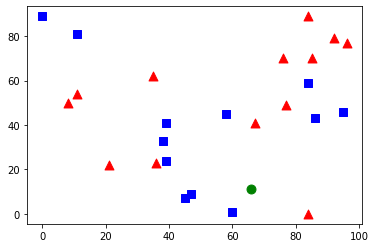

In [8]:
plt.scatter(X_test[:,0], X_test[:,1], 80, 'g', 'o')

red = X[y.ravel()==0]
plt.scatter(red[:,0], red[:,1], 80, 'r', '^')

blue = X[y.ravel()==1]
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')

plt.show()

### 4.2 Implementation From Scratch

- Calculate Euclidean Distance
    - $\sqrt{\sum{{(x - y)}^2}}$
- sort the distance
- find ***k*** closest neighbours

In [9]:
k = 3

In [10]:
xt = np.repeat(X_test, X.shape[0], axis=0)

In [12]:
distance = np.sqrt(np.sum(np.power((X - xt), 2), axis=1))
idx = np.argsort(distance)
sorted_distance = distance[idx][:k]

print(sorted_distance)

[11.661903 19.104973 21.095022]


- predict

In [13]:
neighbours = y[idx][:k][:,0]
print("Neighbours : ", neighbours)

Neighbours :  [1. 1. 0.]


In [14]:
result = np.bincount(neighbours.astype(np.int64)).argmax()
print("y pred : ", result)

y pred :  1


### 4.3 OpenCV Implementation

- Train k-NN model
    - k-NN in OpenCV ML only support Euclidean distance

In [15]:
k = 3 # number of neighbour item

In [16]:
knn = cv2.ml.KNearest_create()
knn.train(X, cv2.ml.ROW_SAMPLE, y)

True

- predict `y` for the `X_test` data 

In [17]:
ret, results, neighbours, dist = knn.findNearest(X_test, k)

In [18]:
print("y pred : ", results)
print("Neighbours : ", neighbours)
print("Distance : ", dist)

y pred :  [[1.]]
Neighbours :  [[1. 1. 0.]]
Distance :  [[136. 365. 445.]]


### 4.4 Scikit-Learn Implementation

- Train k-NN Model

In [19]:
k = 3 # number of neighbour item

In [20]:
neigh = KNeighborsClassifier(metric='euclidean', n_neighbors=k)

- `y` part on Scikit-Learn implementation must in 1D shape array

In [21]:
neigh.fit(X, y.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

- predict `y` for the `X_test` data

In [22]:
result = neigh.predict(X_test)

In [23]:
dist, idx = neigh.kneighbors(X_test)

In [24]:
print("y pred : ", result)

y pred :  [1.]


In [25]:
neighbours =  [int(y[i][0]) for i in idx[0]]
print("Neighbours : ", neighbours)

Neighbours :  [1, 1, 0]


In [26]:
print("Distance : ", dist)

Distance :  [[11.66190379 19.10497317 21.09502311]]


___

## 5. k-NN + Eigenface For Facerecognition

### 5.0 Preprocessing Dataset (pertemuan 5)
- Predic Face, Crop, Resize & Conver to Grayscale

In [27]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

image_list = []
labels = []

for folder in os.listdir("lfw_dataset"):
    for file in os.listdir("lfw_dataset/" + folder):
        img = cv2.imread("lfw_dataset/" + folder + "/" + file)
        
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
        for (x, y, w, h) in faces:
            img_face = img_gray[y:y+h, x:x+w]  # crop face image 
            img_resize = cv2.resize(img_face, (100, 100)) # resize to 100 x 100 pixel
            
            image_list.append(img_resize)
            labels.append(folder) # append label (name) of image

In [28]:
len(image_list)

334

- save detected face into folder

In [29]:
if not os.path.exists("croped_face") :
    os.mkdir("croped_face")

In [30]:
face_folder = "croped_face"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = os.path.join(face_folder, labels[i])
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # remove image if exist
    file_name = labels[i] + "_%4d.jpg" % i
    file_path = os.path.join(*[face_folder, labels[i], file_name])
    if os.path.exists(file_path) :
        os.remove(file_path) # remove file using os.remove
        
    # save image
    cv2.imwrite(file_path, img)

### 5.1. Load Croped Face Dataset (pertemuan 5)

In [31]:
image_faces= []
labels = []

for folder in os.listdir("croped_face"):
    for file in os.listdir("croped_face/" + folder):
        img = cv2.imread("croped_face/" + folder + "/" + file, 0)
        flatten_vector = img.flatten() 
        image_faces.append(flatten_vector)
        labels.append(folder) # append label (name) of image

In [32]:
image_faces[0].shape # 1D vector from 100x100 pixel face image 

(10000,)

### 5.2 Label Encoding (Scikit-Learn)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
labels

['Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell

In [35]:
le = LabelEncoder()

le.fit(labels)

label_name = le.classes_
print(label_name)

['Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush' 'Gerhard_Schroeder'
 'Tony_Blair']


In [36]:
labels_vec = le.transform(labels)

In [37]:
print(labels_vec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4]


### 5.3 Split dataset (75% train, 25% test)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(np.array(image_faces, dtype=np.float32),    # input data
                                                    np.array(labels_vec),                    # target/output data 
                                                    test_size=0.30,                          # split ratio test (25%)
                                                    random_state=42)

In [40]:
print(X_train.shape, y_train.shape, X_test.shape,  y_test.shape)

(233, 10000) (233,) (101, 10000) (101,)


### 5.4 Calculate Eigenface using PCA (pertemuan 5)

In [41]:
from sklearn.decomposition import PCA

In [42]:
h, w = 100, 100

In [43]:
K = 233
pca = PCA(n_components=K).fit(X_train)

- Show Eigenface

In [44]:
eigenfaces = pca.components_.reshape((K, h, w))

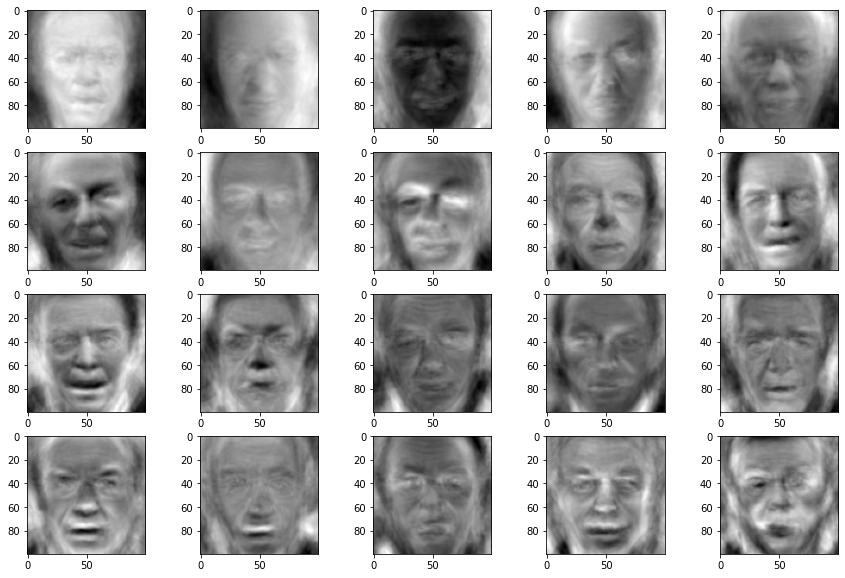

In [45]:
plt.figure(figsize=(15, 10))
for i in range(K)[:20]: # display 20 eigenface
    plt.subplot(4, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap="gray")

- Projecting Input data to PCA

In [46]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
X_train[0].shape

(10000,)

In [48]:
X_train_pca[0].shape

(233,)

- save PCA model

In [49]:
import pickle

def save_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

In [50]:
save_model(pca, "pca_model.pkl")

### 5.5 Apply to k-NN

- Train k-NN Model

In [102]:
k = 1

In [103]:
neigh = KNeighborsClassifier(metric='euclidean', n_neighbors=k)

- `y` part on Scikit-Learn implementation must in 1D shape array

In [104]:
neigh.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

- predict `y` for the `X_test` data

In [105]:
y_pred = neigh.predict(X_test_pca)

- save model

In [106]:
save_model(neigh, "k-NN_scikit_model.pkl")

### 5.6 Model Evaluation

In [107]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [108]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

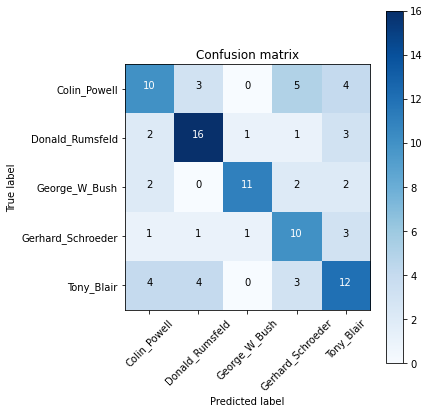

In [109]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(labels_vec))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_name,normalize=False,
                      title='Confusion matrix')

In [110]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=label_name))

                   precision    recall  f1-score   support

     Colin_Powell       0.53      0.45      0.49        22
  Donald_Rumsfeld       0.67      0.70      0.68        23
    George_W_Bush       0.85      0.65      0.73        17
Gerhard_Schroeder       0.48      0.62      0.54        16
       Tony_Blair       0.50      0.52      0.51        23

         accuracy                           0.58       101
        macro avg       0.60      0.59      0.59       101
     weighted avg       0.60      0.58      0.59       101



![](resource/prec_rec.png)

## 6. Compare with Eigenface Facerecognizer Implementation OpenCV Contrib

- install OpenCV Contrib (extra module OpenCV)

In [ ]:
#! pip install opencv-contrib-python

- Eigenface using OpenCV

In [61]:
model = cv2.face.EigenFaceRecognizer_create(num_components=233)

In [62]:
model.train(X_train, y_train)

In [63]:
y_pred = [model.predict(img)[0] for img in X_test]

- evaluate model

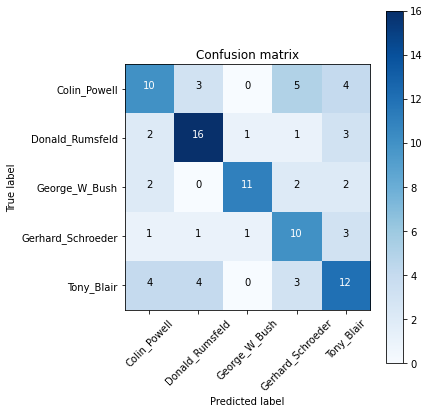

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(labels_vec))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_name,normalize=False,
                      title='Confusion matrix')

In [65]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=label_name))

                   precision    recall  f1-score   support

     Colin_Powell       0.53      0.45      0.49        22
  Donald_Rumsfeld       0.67      0.70      0.68        23
    George_W_Bush       0.85      0.65      0.73        17
Gerhard_Schroeder       0.48      0.62      0.54        16
       Tony_Blair       0.50      0.52      0.51        23

         accuracy                           0.58       101
        macro avg       0.60      0.59      0.59       101
     weighted avg       0.60      0.58      0.59       101



## 7. Support Vector Machines
- Are supervised learning models with associated learning algorithms that analyze data used for **classification** and **regression analysis**.
- Support Vector Machines is a **discriminative classifier** formally defined by a **separating hyperplane**. In other words, given labeled training data (supervised learning), the algorithm outputs an **optimal hyperplane** which categorizes new examples.
- Developed at AT&T Bell Laboratories by Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997).
- One of the most robust prediction methods, based on the statistical learning framework or VC theory proposed by Vapnik and Chervonenkis (1974) and Vapnik (1982, 1995).

#### Linearly Separable Data
- H1 does not separate the classes. 
- H2 does, but only with a small margin. 
- H3 separates them with the **maximal margin**.<br>

<img src="resource/lineary_sparable.png" style="width:250px"></img>

- **Maximum-margin hyperplane** and **margins** for an SVM trained with samples from two classes. 
- Samples on the margin are called the **support vectors**. <br>
<img src="resource/SVM_margin.png" style="width:250px"></img>
- Multiclass Dataset :<br>
<img src="resource/multicalss_svm.png" style="width:500px"></img>


## 8. SVM Implementation
### 8. OpenCV Implementation

- `cv.ml.SVM_create()` : create empty model SVM
- method `.setType(svm_type)` :
    - where `svm_type` :
        - `cv2.ml.SVM_C_SVC` : $C$-Support Vector Classification. n-class classification (n ≥ 2), allows imperfect separation of classes.
        - `cv2.ml.SVM_NU_SVC` : $ν$-Support Vector Classification. n-class classification with imperfect separation. Parameter $ν$ (0..1).
        - `cv2.ml.SVM_ONE_CLASS` : Distribution Estimation (One-class SVM). 
        - `cv2.ml.SVM_EPS_SVR` : $ϵ$-Support Vector Regression. 
        - `cv2.ml.SVM_NU_SVR` : $ν$-Support Vector Regression. 
    - `svm_type` parameter :
        - set $C$ (regularization parameter) if using C-SVC/NU-SVR/EPS-SVR : `.setC()`
        - set $ϵ$ (epsilon) if using EPS-SVR : `.setP()`
        - set $ν$ (nu) if using NU-SVC/NU-SVR/SVM-ONE_CLASS : `.setNU()`
- method `.setKernel(kernel_type)` :
    - where `kernel_type` :
        - `cv2.ml.SVM_LINEAR` : Linear kernel, It is the fastest option
        - `cv2.ml.SVM_POLY` : Polynomial kernel
        - `cv2.ml.SVM_RBF` : Radial basis function (RBF), a good choice in most cases
        - `cv2.ml.SVM_SIGMOID` : Sigmoid kernel
    - Kernel Parameter :
        - **linear** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: $\langle x, x'\rangle$
        - **polynomial** &nbsp;&nbsp;&nbsp;&nbsp;: $(\gamma \langle x, x'\rangle + r)^d$ , where $d$ is specified by parameter `degree`, $r$ by `coef0`.
        - **rbf**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: $\exp(-\gamma \|x-x'\|^2)$, where $\gamma$ is specified by parameter `gamma`, must be greater than `0`.
        - **sigmoid**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: $\tanh(\gamma \langle x,x'\rangle + r)$, where $r$ is specified by `coef0`.
    - Set kernel parameter :
        - set `degree` :  use method `.setDegree()`
        - set `gamma` : use method `.setGamma()`
        - set `coef0` : use method `.setCoef0()`
- method `.setTermCriteria(criteria_type, maxCount, epsilon)`:
    - where `criteria_type` :
        - `cv2.TERM_CRITERIA_MAX_ITER` : the maximum number of iterations or elements to compute
        - `cv2.TERM_CRITERIA_EPS` : the desired accuracy or change in parameters at which the iterative algorithm stops
        - `cv2.TERM_CRITERIA_MAX_ITER` + `cv2.TERM_CRITERIA_EPS`
        - `maxCount` and `epsilon` is termination value for each selected createria by `criteria_type` 

- create SVM model

In [164]:
svm_model = cv2.ml.SVM_create()
svm_model.setType(cv2.ml.SVM_C_SVC)
svm_model.setKernel(cv2.ml.SVM_LINEAR)
svm_model.setC(100) 
#svm_model.setGamma(0.001) 
svm_model.setCoef0(0.1)
svm_model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001))

- Train SVM

In [165]:
svm_model.train(X_train_pca, cv2.ml.ROW_SAMPLE, y_train)

True

- predict result

In [166]:
y_pred = svm_model.predict(np.float32(X_test_pca))[1]

- save model 

In [167]:
svm_model.save("SVM_OpenCV_model.yml")

- evaluate model

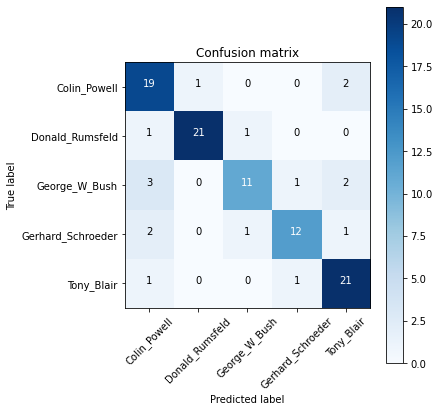

In [168]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(labels_vec))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_name,normalize=False,
                      title='Confusion matrix')

In [169]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=label_name))

                   precision    recall  f1-score   support

     Colin_Powell       0.73      0.86      0.79        22
  Donald_Rumsfeld       0.95      0.91      0.93        23
    George_W_Bush       0.85      0.65      0.73        17
Gerhard_Schroeder       0.86      0.75      0.80        16
       Tony_Blair       0.81      0.91      0.86        23

         accuracy                           0.83       101
        macro avg       0.84      0.82      0.82       101
     weighted avg       0.84      0.83      0.83       101



### 8.2 Scikit-Learn Implementation

In [117]:
from sklearn.svm import SVC

In [118]:
svm = SVC(kernel='linear', C=100, gamma=0.001)

In [119]:
svm.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.001, kernel='linear')

- predict result

In [120]:
y_pred = svm.predict(X_test_pca)

- save model

In [121]:
save_model(svm, "SVM_scikit_model.pkl")

- evaluate model

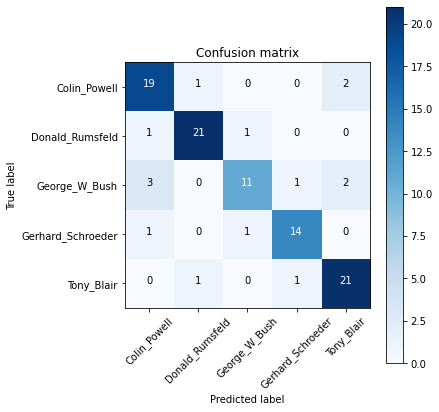

In [122]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(labels_vec))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_name,normalize=False,
                      title='Confusion matrix')

In [123]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=label_name))

                   precision    recall  f1-score   support

     Colin_Powell       0.79      0.86      0.83        22
  Donald_Rumsfeld       0.91      0.91      0.91        23
    George_W_Bush       0.85      0.65      0.73        17
Gerhard_Schroeder       0.88      0.88      0.88        16
       Tony_Blair       0.84      0.91      0.87        23

         accuracy                           0.85       101
        macro avg       0.85      0.84      0.84       101
     weighted avg       0.85      0.85      0.85       101

